In [263]:
# install.packages("ggplot2")
# install.packages("psych")
library("ggplot2")
library("car")
library("tidyverse")
# library("psych")

In [264]:
raw <- read.csv("csgo_round_snapshots.csv")

In [265]:
col <- colnames(raw)
col

str(raw, list.len = ncol(raw))  

[1] "time_left"                    "ct_score"                    
 [3] "t_score"                      "map"                         
 [5] "bomb_planted"                 "ct_health"                   
 [7] "t_health"                     "ct_armor"                    
 [9] "t_armor"                      "ct_money"                    
[11] "t_money"                      "ct_helmets"                  
[13] "t_helmets"                    "ct_defuse_kits"              
[15] "ct_players_alive"             "t_players_alive"             
[17] "ct_weapon_ak47"               "t_weapon_ak47"               
[19] "ct_weapon_aug"                "t_weapon_aug"                
[21] "ct_weapon_awp"                "t_weapon_awp"                
[23] "ct_weapon_bizon"              "t_weapon_bizon"              
[25] "ct_weapon_cz75auto"           "t_weapon_cz75auto"           
[27] "ct_weapon_elite"              "t_weapon_elite"              
[29] "ct_weapon_famas"              "t_weapon_famas"              
[31] "ct_weapon_g3sg1"              "t_weapon_g3sg1"              
[33] "ct_weapon_galilar"            "t_weapon_galilar"            
[35] "ct_weapon_glock"              "t_weapon_glock"              
[37] "ct_weapon_m249"               "t_weapon_m249"               
[39] "ct_weapon_m4a1s"              "t_weapon_m4a1s"              
[41] "ct_weapon_m4a4"               "t_weapon_m4a4"               
[43] "ct_weapon_mac10"              "t_weapon_mac10"              
[45] "ct_weapon_mag7"               "t_weapon_mag7"               
[47] "ct_weapon_mp5sd"              "t_weapon_mp5sd"              
[49] "ct_weapon_mp7"                "t_weapon_mp7"                
[51] "ct_weapon_mp9"                "t_weapon_mp9"                
[53] "ct_weapon_negev"              "t_weapon_negev"              
[55] "ct_weapon_nova"               "t_weapon_nova"               
[57] "ct_weapon_p90"                "t_weapon_p90"                
[59] "ct_weapon_r8revolver"         "t_weapon_r8revolver"         
[61] "ct_weapon_sawedoff"           "t_weapon_sawedoff"           
[63] "ct_weapon_scar20"             "t_weapon_scar20"             
[65] "ct_weapon_sg553"              "t_weapon_sg553"              
[67] "ct_weapon_ssg08"              "t_weapon_ssg08"              
[69] "ct_weapon_ump45"              "t_weapon_ump45"              
[71] "ct_weapon_xm1014"             "t_weapon_xm1014"             
[73] "ct_weapon_deagle"             "t_weapon_deagle"             
[75] "ct_weapon_fiveseven"          "t_weapon_fiveseven"          
[77] "ct_weapon_usps"               "t_weapon_usps"               
[79] "ct_weapon_p250"               "t_weapon_p250"               
[81] "ct_weapon_p2000"              "t_weapon_p2000"              
[83] "ct_weapon_tec9"               "t_weapon_tec9"               
[85] "ct_grenade_hegrenade"         "t_grenade_hegrenade"         
[87] "ct_grenade_flashbang"         "t_grenade_flashbang"         
[89] "ct_grenade_smokegrenade"      "t_grenade_smokegrenade"      
[91] "ct_grenade_incendiarygrenade" "t_grenade_incendiarygrenade" 
[93] "ct_grenade_molotovgrenade"    "t_grenade_molotovgrenade"    
[95] "ct_grenade_decoygrenade"      "t_grenade_decoygrenade"      
[97] "round_winner"

'data.frame':	122410 obs. of  97 variables:
 $ time_left                   : num  175 156 96 76 175 ...
 $ ct_score                    : num  0 0 0 0 1 1 1 1 1 2 ...
 $ t_score                     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ map                         : chr  "de_dust2" "de_dust2" "de_dust2" "de_dust2" ...
 $ bomb_planted                : chr  "False" "False" "False" "False" ...
 $ ct_health                   : num  500 500 391 391 500 500 295 295 249 500 ...
 $ t_health                    : num  500 500 400 400 500 500 111 111 89 500 ...
 $ ct_armor                    : num  0 400 294 294 192 500 296 296 269 196 ...
 $ t_armor                     : num  0 300 200 200 0 0 0 0 0 0 ...
 $ ct_money                    : num  4000 600 750 750 18350 ...
 $ t_money                     : num  4000 650 500 500 10750 ...
 $ ct_helmets                  : num  0 0 0 0 0 5 3 3 3 2 ...
 $ t_helmets                   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ ct_defuse_kits              : num  0 1 1 1 1

In [266]:
### Features seleting (Assumed to be useful):
# time_left
# bomb_planted
# ct_health, ct_armor, ct_money, ct_helmets, ct_defuse_kits, ct_players_alive
# t_health, t_armor, t_money, t_helmets, t_players_alive
# ct_weapon_ak47, ct_weapon_awp, ct_weapon_m4a1s, ct_weapon_m4a4, ct_weapon_deagle
# t_weapon_ak47, t_weapon_awp, t_weapon_m4a1s, t_weapon_m4a4, t_weapon_deagle, t_weapon_tec9
# ct_grenade_hegrenade, ct_grenade_flashbang, ct_grenade_smokegrenade, ct_grenade_incendiarygrenade, ct_grenade_molotovgrenade
# t_grenade_hegrenade, t_grenade_flashbang, t_grenade_smokegrenade, t_grenade_incendiarygrenade, t_grenade_molotovgrenade
## For incendiary in T, probablyt can combine with molotov to reduce complexity?

### Doubt to be useful

# ct_weapon_bizon, ct_weapon_elite, ct_weapon_g3sg1,
# t_weapon_bizon, t_weapon_elite, t_weapon_g3sg1, 

# ct_weapon_mag7, ct_weapon_m249, ct_weapon_mac10, ct_weapon_mp5sd, ct_weapon_mp7, ct_weapon_mp9, ct_weapon_negev, ct_weapon_nova
# t_weapon_mag7, t_weapon_m249, t_weapon_mac10, t_weapon_mp5sd, t_weapon_mp7, t_weapon_mp9, t_weapon_negev, t_weapon_nova

# ct_weapon_p90, ct_weapon_r8revolver, ct_weapon_sawedoff, ct_weapon_scar20, ct_weapon_sg553, ct_weapon_ssg08, ct_weapon_ump45, ct_weapon_xm1014, ct_weapon_fiveseven
# t_weapon_p90, t_weapon_r8revolver, t_weapon_sawedoff, t_weapon_scar20, t_weapon_sg553, t_weapon_ssg08, t_weapon_ump45, t_weapon_xm1014, t_weapon_fiveseven


### 100% not useful
# ct_grenade_decoygrenade
# t_grenade_decoygrenade


[1] "de_dust2"    "de_mirage"   "de_nuke"     "de_inferno"  "de_overpass"
[6] "de_vertigo"  "de_train"    "de_cache"

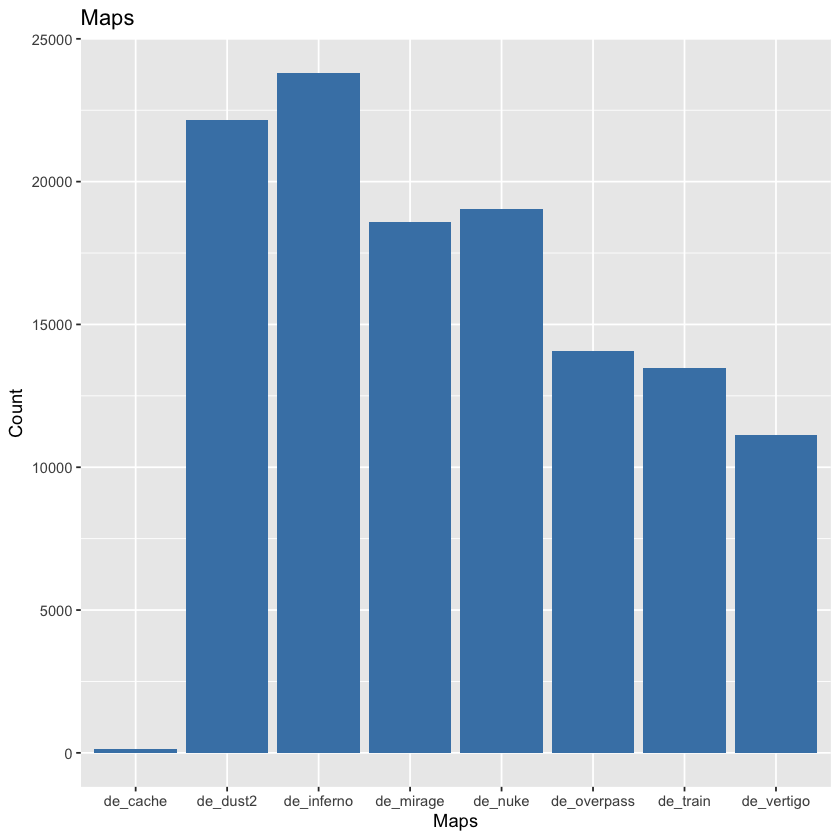

In [267]:
df <- raw

mapGroups <- unique(df$map)
mapGroups

ggplot(df, aes(x = map)) + 
  geom_bar(fill = "steelblue") + 
  labs(title = "Maps", 
       x = "Maps", y = "Count") 

# Trying to convert map to indicator variable
df$dust2 <- ifelse(raw$map == "de_dust2", 1, 0)
df$mirage <- ifelse(raw$map == "de_mirage", 1, 0)
df$nuke <- ifelse(raw$map == "de_nuke", 1, 0)
df$inferno <- ifelse(raw$map == "de_inferno", 1, 0)
df$overpass <- ifelse(raw$map == "de_overpass", 1, 0)
df$vertigo <- ifelse(raw$map == "de_vertigo", 1, 0)
df$train <- ifelse(raw$map == "de_train", 1, 0)

# cache seems having too less data
df$cache <- ifelse(raw$map == "de_cache", 1, 0)

df$CTWin <- ifelse(raw$round_winner == "CT", 1, 0)

df$bomb_planted <- ifelse(raw$bomb_planted == "True", 1, 0)

df$t_grenade_MollyAndInc <- raw$t_grenade_molotovgrenade + raw$t_grenade_incendiarygrenade
df$ct_grenade_MollyAndInc <- raw$ct_grenade_molotovgrenade + raw$ct_grenade_incendiarygrenade

df$ct_health_advantage <- raw$ct_health - raw$t_health
df$ct_score_diff <- raw$ct_score - raw$t_score
df$ct_alive_diff <- raw$ct_players_alive - raw$t_players_alive

In [268]:
options(repr.matrix.max.cols=999, repr.matrix.max.rows=999)

tdf <- subset(df, select = -c(map, round_winner, cache
                              , ct_grenade_decoygrenade, t_grenade_decoygrenade
                              , t_grenade_molotovgrenade, t_grenade_incendiarygrenade
                              , ct_grenade_molotovgrenade, ct_grenade_incendiarygrenade
                              , ct_health, t_health, ct_score, t_score
                              , ct_players_alive, t_players_alive
                              , t_weapon_glock, ct_weapon_glock, t_weapon_usps, ct_weapon_usps, t_weapon_p2000, ct_weapon_p2000
                              , ct_weapon_bizon, ct_weapon_g3sg1, t_weapon_m249, ct_weapon_negev, ct_weapon_r8revolver, ct_weapon_sawedoff
                              , time_left
                              , ct_helmets
                              ))
str(tdf, list.len = ncol(tdf))  

dfCor <- cor(tdf)
dfCor

'data.frame':	122410 obs. of  82 variables:
 $ bomb_planted           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ ct_armor               : num  0 400 294 294 192 500 296 296 269 196 ...
 $ t_armor                : num  0 300 200 200 0 0 0 0 0 0 ...
 $ ct_money               : num  4000 600 750 750 18350 ...
 $ t_money                : num  4000 650 500 500 10750 ...
 $ t_helmets              : num  0 0 0 0 0 0 0 0 0 0 ...
 $ ct_defuse_kits         : num  0 1 1 1 1 1 0 0 0 0 ...
 $ ct_weapon_ak47         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ t_weapon_ak47          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ ct_weapon_aug          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ t_weapon_aug           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ ct_weapon_awp          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ t_weapon_awp           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ t_weapon_bizon         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ ct_weapon_cz75auto     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ t_weapon_cz75auto      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ ct_weapon_e

,bomb_planted,ct_armor,t_armor,ct_money,t_money,t_helmets,ct_defuse_kits,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,ct_weapon_m4a4,t_weapon_m4a4,ct_weapon_mac10,t_weapon_mac10,ct_weapon_mag7,t_weapon_mag7,ct_weapon_mp5sd,t_weapon_mp5sd,ct_weapon_mp7,t_weapon_mp7,ct_weapon_mp9,t_weapon_mp9,t_weapon_negev,ct_weapon_nova,t_weapon_nova,ct_weapon_p90,t_weapon_p90,t_weapon_r8revolver,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_p250,t_weapon_p250,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,dust2,mirage,nuke,inferno,overpass,vertigo,train,CTWin,t_grenade_MollyAndInc,ct_grenade_MollyAndInc,ct_health_advantage,ct_score_diff,ct_alive_diff
bomb_planted,1.0000000000,-0.2814743518,-0.0966193137,-0.1901068609,-0.1258217469,-0.0459416647,-0.1534953496,-3.744635e-02,-0.0274652570,-0.0481587181,0.0211126725,-0.0868143555,0.008039894,-3.381445e-04,-0.0424905531,-0.0137977855,-1.266944e-02,-0.0013916318,-0.0550616964,0.0147109223,-6.171815e-03,-0.0007254713,-0.0138185222,-1.013989e-03,-0.0382930649,0.0144837455,-1.520347e-01,0.0587141877,0.0180548854,-0.0175939974,-1.316930e-02,4.922476e-03,-0.0067914852,5.399658e-03,-3.871266e-03,0.0007439778,-0.0674841619,0.0186667937,-1.013989e-03,-0.0036571938,-3.656168e-03,-4.535048e-03,-4.420200e-03,-2.682828e-03,-4.181056e-03,-4.679064e-03,-1.013989e-03,-0.0434916419,-0.0238312549,-0.0195100793,-1.467974e-02,-0.0312474193,-0.0022121375,-0.0186590125,6.779962e-04,-6.046165e-02,-3.754226e-02,-0.0231855930,0.0086918657,-5.967950e-02,-3.815518e-02,-1.287481e-02,-0.0076569943,-0.197123054,-0.1191813460,-0.2298714541,-0.197066869,-0.2172220313,-0.2317080271,0.0131037145,1.186611e-03,-0.0196618444,0.0275223102,-0.0191024649,-0.0019820122,-0.0077933171,-1.871009e-01,-0.2181692200,-0.1917790682,-0.2016216128,-6.408991e-03,-2.492480e-01
ct_armor,-0.2814743518,1.0000000000,0.2959565786,-0.0503075068,-0.1467432173,0.2247225291,0.6008149023,2.072663e-01,0.1664826961,0.1905071748,-0.0307636839,0.4391972060,0.052677162,-5.176175e-03,0.0863170214,0.0873513828,1.886262e-02,0.0127220299,0.1892676452,-0.0277093130,1.321584e-02,0.0216190313,0.0358307303,3.039174e-03,0.1628929282,-0.0184011322,5.920451e-01,-0.0791572367,-0.0136177398,-0.0127568562,2.449456e-02,-2.973695e-03,0.0223446017,-1.350582e-02,2.195021e-02,-0.0098650623,0.2138253010,-0.0260459024,2.788497e-03,0.0073308058,8.353426e-03,9.732165e-03,9.717098e-03,8.085313e-03,9.937432e-03,1.709674e-02,-5.249883e-03,0.2063197402,0.1240194644,0.0250321801,3.859409e-02,0.1227364228,-0.0085599465,0.0580945936,9.261359e-04,1.085734e-01,1.500652e-01,0.0567040031,-0.0425381278,1.258623e-01,7.481793e-02,4.496332e-02,0.0593325320,0.550046936,0.1131934389,0.7279207038,0.281213107,0.6660980171,0.2905918500,-0.0181655649,-7.769620e-03,0.0180847012,0.0119339343,-0.0016965058,-0.0111846643,0.0064969766,3.363818e-01,0.2862841249,0.5640524081,0.2989941125,7.485526e-02,3.083003e-01
t_armor,-0.0966193137,0.2959565786,1.0000000000,-0.1687870888,-0.0645014797,0.8776262289,0.1172979153,-7.827750e-02,0.5911559560,0.0677274857,0.0249664057,0.1222748511,0.331121613,8.002196e-03,0.1069553830,0.1137170129,-1.227753e-03,0.0227269934,0.0487868973,0.0158678830,1.999737e-02,-0.0323606098,0.1966967379,3.299921e-03,0.0741252342,0.0199239311,2.678196e-01,0.0591479109,-0.0157291689,0.2090050474,3.856209e-02,9.780965e-04,-0.0043517778,4.110663e-02,-9.443019e-04,0.0316363045,0.0129954812,0.0002951783,1.662692e-03,0.0171879921,9.423730e-03,2

# First model that without deleting any of the weapons

In [269]:
set.seed(1)

split <- sample(c(TRUE, FALSE), nrow(tdf), replace=TRUE, prob=c(0.7,0.3))
train  <- tdf[split, ]
test   <- tdf[!split, ]


In [270]:
lModel <- glm(CTWin ~ ., data=train, family = "binomial")

In [271]:
summary(lModel)


Call:
glm(formula = CTWin ~ ., family = "binomial", data = train)

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)              4.220e-01  2.823e-01   1.495 0.134970    
bomb_planted            -8.777e-01  3.823e-02 -22.957  < 2e-16 ***
ct_armor                 2.810e-03  1.141e-04  24.626  < 2e-16 ***
t_armor                 -2.963e-03  1.332e-04 -22.244  < 2e-16 ***
ct_money                 1.309e-05  1.178e-06  11.113  < 2e-16 ***
t_money                 -1.224e-05  1.035e-06 -11.822  < 2e-16 ***
t_helmets               -1.309e-01  1.887e-02  -6.934 4.09e-12 ***
ct_defuse_kits           3.521e-02  9.883e-03   3.563 0.000367 ***
ct_weapon_ak47           3.534e-01  1.981e-02  17.842  < 2e-16 ***
t_weapon_ak47           -4.089e-01  1.844e-02 -22.173  < 2e-16 ***
ct_weapon_aug            4.742e-01  2.228e-02  21.288  < 2e-16 ***
t_weapon_aug            -3.401e-01  1.015e-01  -3.350 0.000808 ***
ct_weapon_awp            5.141e-01  1.915e-02  

In [272]:
predictions <- predict(lModel, test, type = "response")

correct <- 0

for (i in seq_along(predictions)){
    if (predictions[i] >= 0.5 && test$CTWin[i] == 1) {
        correct <- correct + 1
    }
}

print(correct/length(predictions))

# Prototype of the model: 0.368768
# Post model ct_helmets vs dropping ct_heltms : 0.3698033 vs 0.3697761


[1] 0.3697761


In [273]:
# How if use im only?
lmModel <- lm(CTWin ~ ., data=train)
summary(lmModel)


Call:
lm(formula = CTWin ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.17745 -0.35612  0.00901  0.36441  1.13507 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              5.766e-01  4.309e-02  13.381  < 2e-16 ***
bomb_planted            -9.314e-02  5.091e-03 -18.296  < 2e-16 ***
ct_armor                 5.052e-04  1.876e-05  26.936  < 2e-16 ***
t_armor                 -5.495e-04  2.227e-05 -24.672  < 2e-16 ***
ct_money                 2.302e-06  1.885e-07  12.215  < 2e-16 ***
t_money                 -2.414e-06  1.664e-07 -14.508  < 2e-16 ***
t_helmets               -9.199e-03  3.157e-03  -2.914 0.003566 ** 
ct_defuse_kits           4.918e-03  1.632e-03   3.013 0.002590 ** 
ct_weapon_ak47           5.586e-02  3.114e-03  17.940  < 2e-16 ***
t_weapon_ak47           -6.965e-02  3.012e-03 -23.121  < 2e-16 ***
ct_weapon_aug            7.338e-02  3.623e-03  20.254  < 2e-16 ***
t_weapon_aug            -6.718e-

In [274]:
# SSR Analysis

# anovaLM <- anova(lmModel)
# anovaLM